In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from rnacappredictor.predict_cap import generate_fingerprint_mixes

In [2]:
df = pd.concat([
    pd.read_csv("../data/FM200/no_sample_id/20250609_1143_MD-101425_FBC21923_a6c9a0a2/fastq_pass/U1-1/fingerprints.csv"),
    pd.read_csv("../data/FM200/no_sample_id/20250609_1143_MD-101425_FBC21923_a6c9a0a2/fastq_pass/U1-11/fingerprints.csv"),
    pd.read_csv("../data/FM200/no_sample_id/20250609_1143_MD-101425_FBC21923_a6c9a0a2/fastq_pass/U1-138P/fingerprints.csv"),
    pd.read_csv("../data/FM200/no_sample_id/20250609_1143_MD-101425_FBC21923_a6c9a0a2/fastq_pass/U1-148P/fingerprints.csv"),
    pd.read_csv("../data/FM200/no_sample_id/20250609_1143_MD-101425_FBC21923_a6c9a0a2/fastq_pass/U6/fingerprints.csv")
])
df['barcode'] = df['barcode'].apply(lambda x: int(x.replace('barcode', '')))

barcode_isoform_to_rt = {
    (1, "U1-1"): "INDURO",
    (6, "U1-1"): "ProtoScript",
    (11, "U1-1"): "Marathon",
    (16, "U1-1"): "GoScript",
    (21, "U1-1"): "EpiScript",
    (4, "U1-11"): "INDURO",
    (9, "U1-11"): "ProtoScript",
    (14, "U1-11"): "Marathon",
    (19, "U1-11"): "GoScript",
    (24, "U1-11"): "EpiScript",
    (2, "U1-138P"): "INDURO",
    (7, "U1-138P"): "ProtoScript",
    (12, "U1-138P"): "Marathon",
    (17, "U1-138P"): "GoScript",
    (22, "U1-138P"): "EpiScript",
    (3, "U1-148P"): "INDURO",
    (8, "U1-148P"): "ProtoScript",
    (13, "U1-148P"): "Marathon",
    (18, "U1-148P"): "GoScript",
    (23, "U1-148P"): "EpiScript",
    (5, "U6"): "INDURO",
    (10, "U6"): "ProtoScript",
    (15, "U6"): "Marathon",
    (20, "U6"): "GoScript",
    (1, "U6"): "EpiScript",
}

df['RT'] = df.apply(lambda row: barcode_isoform_to_rt[(row['barcode'], row['isoform'])], axis=1)
df

,barcode,isoform,num_reads,num_A,num_C,num_G,num_T,num_DEL,num_INS,barcode_num,...,C%_INSDEL,G%_INSDEL,T%_INSDEL,INS%_INSDEL,DEL%_INSDEL,A%,C%,G%,T%,RT
0,1,U1-1,532,370,19,24,25,47,47,1,...,0.035714,0.045113,0.046992,0.088346,0.088346,0.844749,0.043379,0.054795,0.057078,INDURO
1,6,U1-1,16376,10509,1009,605,516,2613,1124,6,...,0.061615,0.036944,0.031510,0.068637,0.159563,0.831474,0.079832,0.047868,0.040826,ProtoScript
2,11,U1-1,14867,8575,861,917,613,3274,627,11,...,0.057913,0.061680,0.041232,0.042174,0.220219,0.781962,0.078515,0.083622,0.055900,Marathon
3,16,U1-1,13228,4397,909,510,458,5838,1116,16,...,0.068718,0.038555,0.034624,0.084366,0.441337,0.700829,0.144884,0.081288,0.073000,GoScript
4,21,U1-1,4170,3133,96,187,95,265,394,21,...,0.023022,0.044844,0.022782,0.094484,0.063549,0.892338,0.027343,0.053261,0.027058,EpiScript
0,4,U1-11,435,133,28,38,124,87,25,4,...,0.064368,0.087356,0.285057,0.057471,0.200000,0.411765,0.086687,0.117647,0.383901,INDURO
1,9,U1-11,1505,555,168,52,544,137,49,9,...,0.111628,0.034551,0.361462,0.032558,0.091030,0.420773,0.127369,0.039424,0.412434,ProtoScript
2,14,U1-11,1125,656,40,57,198,115,59,14,...,0.035556,0.050667,0.176000,0.052444,0.102222,0.689800,0.042061,0.059937,0.208202,Marathon
3,19,U1-11,402,171,30,11,117,50,23,19,...,0.074627,0.027363,0.291045,0.057214,0.124378,0.519757,0.091185,0.033435,0.355623,GoScript
4,24,U1-11,2153,853,168,55,848,142,87,24,...,0.078031,0.025546,0.393869,0.040409,0.065954,0.443347,0.087318,0.028586,0.440748,EpiScript


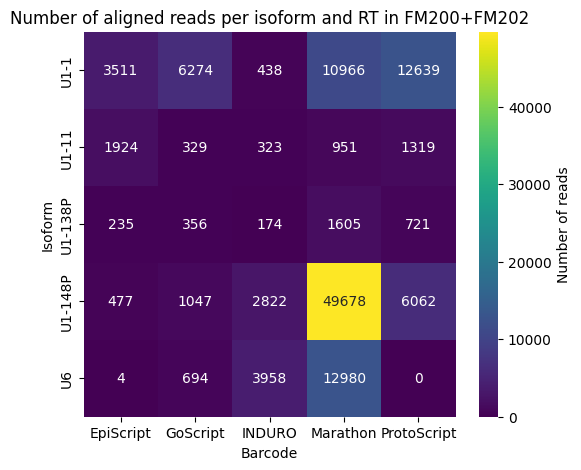

In [3]:
# Pivot the data to create a matrix of isoform x barcode
pivot_df = df.pivot(index='isoform', columns='RT', values='num_reads_ACGT')

# Create heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(pivot_df, cmap='viridis', annot=True, fmt='.0f', cbar_kws={'label': 'Number of reads'})
plt.title('Number of aligned reads per isoform and RT in FM200+FM202')
plt.xlabel('Barcode')
plt.ylabel('Isoform')
plt.show()

In [4]:
from rnacappredictor.predict_cap import predict_cap

df_test = df.copy()
df_test['cap'] = 'Unknown'
df_test['experiment'] = 'FM200+FM202_' + df_test['isoform']

df_train = pd.read_csv('../data/FM179-FM181_fingerprints.csv')
df_res = predict_cap(df_train, df_test, show_true_cap=True)
df_res

Experiment: FM200+FM202_U1-1
True cap: Unknown
5 RTs considered for prediction(['INDURO', 'ProtoScript', 'Marathon', 'GoScript', 'EpiScript']) with mean number of reads 6765.6
Top-1 prediction: NAD-U1 (FM179_combined) with similarity 0.989
Top-2 prediction: NAD-U1 (FM180 + FM181) with similarity 0.988
Top-3 prediction: TMG-U1 (FM180 + FM181) with similarity 0.974
Top-4 prediction: TMG-U1 (FM179_combined) with similarity 0.964
Top-5 prediction: m⁷Gp₃A-U1 (FM179_combined) with similarity 0.879
Top-6 prediction: m⁷Gp₃A-U1 (FM180 + FM181) with similarity 0.813
Top-7 prediction: Ap₄A-U1 (FM179_combined) with similarity 0.778
Top-8 prediction: Ap₄A-U1 (FM180 + FM181) with similarity 0.708


Experiment: FM200+FM202_U1-11
True cap: Unknown
5 RTs considered for prediction(['INDURO', 'ProtoScript', 'Marathon', 'GoScript', 'EpiScript']) with mean number of reads 969.2
Top-1 prediction: Ap₄A-U1 (FM180 + FM181) with similarity 0.888
Top-2 prediction: TMG-U1 (FM179_combined) with similarity 0.883
To

,experiment,true_cap,num_rts,used_rts,mean_reads,prediction_1,similarity_1,prediction_2,similarity_2,prediction_3,...,prediction_4,similarity_4,prediction_5,similarity_5,prediction_6,similarity_6,prediction_7,similarity_7,prediction_8,similarity_8
0,FM200+FM202_U1-1,Unknown,5,"[INDURO, ProtoScript, Marathon, GoScript, EpiS...",6765.6,NAD-U1 (FM179_combined),0.989242,NAD-U1 (FM180 + FM181),0.987781,TMG-U1 (FM180 + FM181),...,TMG-U1 (FM179_combined),0.964068,m⁷Gp₃A-U1 (FM179_combined),0.878507,m⁷Gp₃A-U1 (FM180 + FM181),0.812728,Ap₄A-U1 (FM179_combined),0.777558,Ap₄A-U1 (FM180 + FM181),0.707573
1,FM200+FM202_U1-11,Unknown,5,"[INDURO, ProtoScript, Marathon, GoScript, EpiS...",969.2,Ap₄A-U1 (FM180 + FM181),0.888215,TMG-U1 (FM179_combined),0.883345,m⁷Gp₃A-U1 (FM179_combined),...,Ap₄A-U1 (FM179_combined),0.859080,TMG-U1 (FM180 + FM181),0.849634,NAD-U1 (FM179_combined),0.842894,NAD-U1 (FM180 + FM181),0.841532,m⁷Gp₃A-U1 (FM180 + FM181),0.775568
2,FM200+FM202_U1-138P,Unknown,5,"[INDURO, ProtoScript, Marathon, GoScript, EpiS...",618.2,NAD-U1 (FM179_combined),0.979548,NAD-U1 (FM180 + FM181),0.976188,TMG-U1 (FM179_combined),...,TMG-U1 (FM180 + FM181),0.959217,m⁷Gp₃A-U1 (FM179_combined),0.889047,m⁷Gp₃A-U1 (FM180 + FM181),0.819195,Ap₄A-U1 (FM179_combined),0.773999,Ap₄A-U1 (FM180 + FM181),0.694353
3,FM200+FM202_U1-148P,Unknown,5,"[INDURO, ProtoScript, Marathon, GoScript, EpiS...",12017.2,NAD-U1 (FM179_combined),0.987781,NAD-U1 (FM180 + FM181),0.984224,TMG-U1 (FM180 + FM181),...,TMG-U1 (FM179_combined),0.964184,m⁷Gp₃A-U1 (FM179_combined),0.885771,m⁷Gp₃A-U1 (FM180 + FM181),0.815043,Ap₄A-U1 (FM179_combined),0.779946,Ap₄A-U1 (FM180 + FM181),0.701156
4,FM200+FM202_U6,Unknown,5,"[EpiScript, INDURO, ProtoScript, Marathon, GoS...",3527.2,m⁷Gp₃A-U1 (FM179_combined),0.927715,TMG-U1 (FM179_combined),0.926461,NAD-U1 (FM180 + FM181),...,Ap₄A-U1 (FM180 + FM181),0.909616,NAD-U1 (FM179_combined),0.905920,TMG-U1 (FM180 + FM181),0.898665,m⁷Gp₃A-U1 (FM180 + FM181),0.864077,Ap₄A-U1 (FM179_combined),0.849637


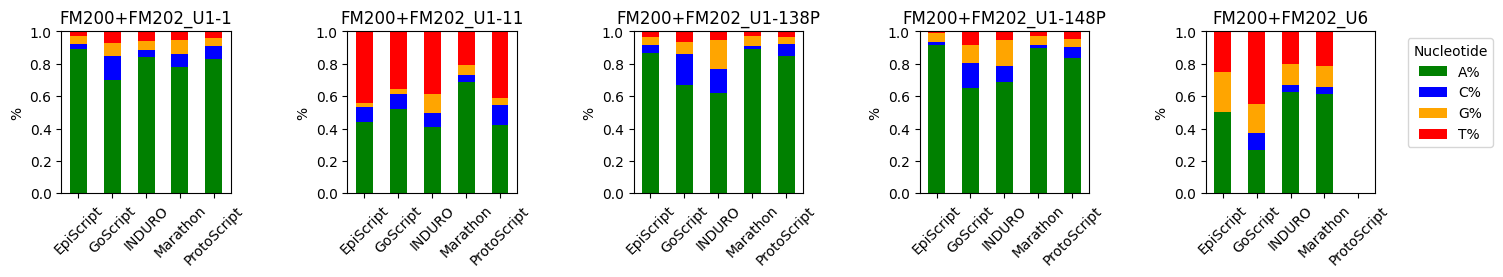

In [5]:
nucleotide_cols = ['A%', 'C%', 'G%', 'T%']
colors = {'A%': 'green', 'C%': 'blue', 'G%': 'orange', 'T%': 'red'}

# Get number of experiments and caps for subplot grid
experiments = df_test['experiment'].unique()
n_rows = 1
n_cols = len(experiments)

# Create figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*3, n_rows*3.3))
fig.tight_layout(pad=5.0)

for i, experiment in enumerate(experiments):
    df_experiment = df_test[df_test['experiment'] == experiment]
    
    subset = df_experiment.copy()
    subset = subset[['RT'] + nucleotide_cols].set_index('RT')
    subset = subset.reindex(sorted(subset.index))
    
    # Plot on appropriate subplot
    if i == n_cols-1:  # Rightmost plot
        ax = subset.plot(kind='bar', stacked=True, ax=axes[i],
                       color=colors, legend=True)
        # Move legend outside with more space
        legend = axes[i].legend(title='Nucleotide', bbox_to_anchor=(1.15, 1))
        # Remove _INSDEL suffix from legend labels
        for text in legend.get_texts():
            text.set_text(text.get_text().replace('_INSDEL', ''))
    else:
        subset.plot(kind='bar', stacked=True, ax=axes[i],
                   color=colors, legend=False)
    
    axes[i].set_title(f"{experiment}")
    axes[i].set_ylabel('%')
    axes[i].set_ylim(0, 1.0)
    
    # Rotate x-axis labels
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel('')

plt.show()

## Deconvolution

In [8]:
len(df_train)

39

In [9]:
df_train = df_train[df_train['experiment'] == 'FM180 + FM181']
df_train_mixes = generate_fingerprint_mixes(df_train)
df_train_mixes

Generating combinations: 100%|██████████| 22907/22907 [01:39<00:00, 230.44it/s]


,RT,A%,C%,G%,T%,cap,experiment
0,INDURO,0.661532,0.069102,0.111356,0.158011,NAD-U1 (0.0%) + Ap₄A-U1 (0.0%) + m⁷Gp₃A-U1 (0....,FM180 + FM181
1,ProtoScript,0.760680,0.082674,0.070016,0.086630,NAD-U1 (0.0%) + Ap₄A-U1 (0.0%) + m⁷Gp₃A-U1 (0....,FM180 + FM181
2,Marathon,0.533987,0.090018,0.083282,0.292713,NAD-U1 (0.0%) + Ap₄A-U1 (0.0%) + m⁷Gp₃A-U1 (0....,FM180 + FM181
3,GoScript,0.595993,0.101836,0.108514,0.193656,NAD-U1 (0.0%) + Ap₄A-U1 (0.0%) + m⁷Gp₃A-U1 (0....,FM180 + FM181
4,EpiScript,0.829305,0.047583,0.078550,0.044562,NAD-U1 (0.0%) + Ap₄A-U1 (0.0%) + m⁷Gp₃A-U1 (0....,FM180 + FM181
...,...,...,...,...,...,...,...
0,INDURO,0.842813,0.033217,0.055755,0.068215,NAD-U1 (100.0%) + Ap₄A-U1 (0.0%) + m⁷Gp₃A-U1 (...,FM180 + FM181
1,ProtoScript,0.806493,0.051014,0.066273,0.076221,NAD-U1 (100.0%) + Ap₄A-U1 (0.0%) + m⁷Gp₃A-U1 (...,FM180 + FM181
2,Marathon,0.850999,0.030378,0.053099,0.065524,NAD-U1 (100.0%) + Ap₄A-U1 (0.0%) + m⁷Gp₃A-U1 (...,FM180 + FM181
3,GoScript,0.538084,0.113022,0.081783,0.267111,NAD-U1 (100.0%) + Ap₄A-U1 (0.0%) + m⁷Gp₃A-U1 (...,FM180 + FM181


In [11]:
df_pred_mixes = predict_cap(df_train_mixes, df_test, include_insdel=False, print_top_k=10)
df_pred_mixes

Experiment: FM200+FM202_U1-1
5 RTs considered for prediction(['INDURO', 'ProtoScript', 'Marathon', 'GoScript', 'EpiScript']) with mean number of reads 6765.6
Top-1 prediction: NAD-U1 (14.0%) + Ap₄A-U1 (0.0%) + m⁷Gp₃A-U1 (0.0%) + TMG-U1 (86.0%) (FM180 + FM181) with similarity 0.992
Top-2 prediction: NAD-U1 (16.0%) + Ap₄A-U1 (0.0%) + m⁷Gp₃A-U1 (0.0%) + TMG-U1 (84.0%) (FM180 + FM181) with similarity 0.992
Top-3 prediction: NAD-U1 (18.0%) + Ap₄A-U1 (0.0%) + m⁷Gp₃A-U1 (0.0%) + TMG-U1 (82.0%) (FM180 + FM181) with similarity 0.992
Top-4 prediction: NAD-U1 (12.0%) + Ap₄A-U1 (0.0%) + m⁷Gp₃A-U1 (0.0%) + TMG-U1 (88.0%) (FM180 + FM181) with similarity 0.992
Top-5 prediction: NAD-U1 (20.0%) + Ap₄A-U1 (0.0%) + m⁷Gp₃A-U1 (0.0%) + TMG-U1 (80.0%) (FM180 + FM181) with similarity 0.992
Top-6 prediction: NAD-U1 (22.0%) + Ap₄A-U1 (0.0%) + m⁷Gp₃A-U1 (0.0%) + TMG-U1 (78.0%) (FM180 + FM181) with similarity 0.991
Top-7 prediction: NAD-U1 (10.0%) + Ap₄A-U1 (0.0%) + m⁷Gp₃A-U1 (0.0%) + TMG-U1 (90.0%) (FM180 + FM1

,experiment,true_cap,num_rts,used_rts,mean_reads,prediction_1,similarity_1,prediction_2,similarity_2,prediction_3,...,prediction_6,similarity_6,prediction_7,similarity_7,prediction_8,similarity_8,prediction_9,similarity_9,prediction_10,similarity_10
0,FM200+FM202_U1-1,None,5,"[INDURO, ProtoScript, Marathon, GoScript, EpiS...",6765.6,NAD-U1 (14.0%) + Ap₄A-U1 (0.0%) + m⁷Gp₃A-U1 (0...,0.991693,NAD-U1 (16.0%) + Ap₄A-U1 (0.0%) + m⁷Gp₃A-U1 (0...,0.991689,NAD-U1 (18.0%) + Ap₄A-U1 (0.0%) + m⁷Gp₃A-U1 (0...,...,NAD-U1 (22.0%) + Ap₄A-U1 (0.0%) + m⁷Gp₃A-U1 (0...,0.991385,NAD-U1 (10.0%) + Ap₄A-U1 (0.0%) + m⁷Gp₃A-U1 (0...,0.991313,NAD-U1 (24.0%) + Ap₄A-U1 (0.0%) + m⁷Gp₃A-U1 (0...,0.991242,NAD-U1 (26.0%) + Ap₄A-U1 (0.0%) + m⁷Gp₃A-U1 (0...,0.991093,NAD-U1 (28.0%) + Ap₄A-U1 (0.0%) + m⁷Gp₃A-U1 (0...,0.990941
1,FM200+FM202_U1-11,None,5,"[INDURO, ProtoScript, Marathon, GoScript, EpiS...",969.2,NAD-U1 (0.0%) + Ap₄A-U1 (18.0%) + m⁷Gp₃A-U1 (2...,0.894038,NAD-U1 (0.0%) + Ap₄A-U1 (16.0%) + m⁷Gp₃A-U1 (2...,0.894021,NAD-U1 (0.0%) + Ap₄A-U1 (20.0%) + m⁷Gp₃A-U1 (2...,...,NAD-U1 (0.0%) + Ap₄A-U1 (24.0%) + m⁷Gp₃A-U1 (2...,0.893820,NAD-U1 (0.0%) + Ap₄A-U1 (12.0%) + m⁷Gp₃A-U1 (2...,0.893720,NAD-U1 (0.0%) + Ap₄A-U1 (26.0%) + m⁷Gp₃A-U1 (2...,0.893696,NAD-U1 (0.0%) + Ap₄A-U1 (16.0%) + m⁷Gp₃A-U1 (0...,0.893590,NAD-U1 (0.0%) + Ap₄A-U1 (18.0%) + m⁷Gp₃A-U1 (0...,0.893573
2,FM200+FM202_U1-138P,None,5,"[INDURO, ProtoScript, Marathon, GoScript, EpiS...",618.2,NAD-U1 (22.0%) + Ap₄A-U1 (0.0%) + m⁷Gp₃A-U1 (0...,0.978026,NAD-U1 (20.0%) + Ap₄A-U1 (0.0%) + m⁷Gp₃A-U1 (0...,0.978013,NAD-U1 (24.0%) + Ap₄A-U1 (0.0%) + m⁷Gp₃A-U1 (0...,...,NAD-U1 (28.0%) + Ap₄A-U1 (0.0%) + m⁷Gp₃A-U1 (0...,0.977936,NAD-U1 (30.0%) + Ap₄A-U1 (0.0%) + m⁷Gp₃A-U1 (0...,0.977883,NAD-U1 (16.0%) + Ap₄A-U1 (0.0%) + m⁷Gp₃A-U1 (0...,0.977855,NAD-U1 (32.0%) + Ap₄A-U1 (0.0%) + m⁷Gp₃A-U1 (0...,0.977824,NAD-U1 (34.0%) + Ap₄A-U1 (0.0%) + m⁷Gp₃A-U1 (0...,0.977762
3,FM200+FM202_U1-148P,None,5,"[INDURO, ProtoScript, Marathon, GoScript, EpiS...",12017.2,NAD-U1 (24.0%) + Ap₄A-U1 (0.0%) + m⁷Gp₃A-U1 (0...,0.985744,NAD-U1 (26.0%) + Ap₄A-U1 (0.0%) + m⁷Gp₃A-U1 (0...,0.985742,NAD-U1 (22.0%) + Ap₄A-U1 (0.0%) + m⁷Gp₃A-U1 (0...,...,NAD-U1 (20.0%) + Ap₄A-U1 (0.0%) + m⁷Gp₃A-U1 (0...,0.985671,NAD-U1 (32.0%) + Ap₄A-U1 (0.0%) + m⁷Gp₃A-U1 (0...,0.985653,NAD-U1 (34.0%) + Ap₄A-U1 (0.0%) + m⁷Gp₃A-U1 (0...,0.985609,NAD-U1 (18.0%) + Ap₄A-U1 (0.0%) + m⁷Gp₃A-U1 (0...,0.985571,NAD-U1 (36.0%) + Ap₄A-U1 (0.0%) + m⁷Gp₃A-U1 (0...,0.985560
4,FM200+FM202_U6,None,5,"[EpiScript, INDURO, ProtoScript, Marathon, GoS...",3527.2,NAD-U1 (4.0%) + Ap₄A-U1 (10.0%) + m⁷Gp₃A-U1 (8...,0.967489,NAD-U1 (4.0%) + Ap₄A-U1 (8.0%) + m⁷Gp₃A-U1 (6....,0.967489,NAD-U1 (4.0%) + Ap₄A-U1 (8.0%) + m⁷Gp₃A-U1 (8....,...,NAD-U1 (6.0%) + Ap₄A-U1 (10.0%) + m⁷Gp₃A-U1 (1...,0.967284,NAD-U1 (6.0%) + Ap₄A-U1 (12.0%) + m⁷Gp₃A-U1 (1...,0.967279,NAD-U1 (4.0%) + Ap₄A-U1 (10.0%) + m⁷Gp₃A-U1 (1...,0.967263,NAD-U1 (2.0%) + Ap₄A-U1 (8.0%) + m⁷Gp₃A-U1 (8....,0.967183,NAD-U1 (2.0%) + Ap₄A-U1 (6.0%) + m⁷Gp₃A-U1 (6....,0.967138


In [19]:
# Get number of predictions by counting prediction_X columns
num_preds = len([col for col in df_pred_mixes.columns if col.startswith('prediction_')])

import re

# Function to extract percentages from prediction string
def extract_cap_percentages(pred_str):
    nad = float(re.search(r'NAD-U1 \(([\d.]+)%\)', pred_str).group(1))
    ap4a = float(re.search(r'Ap₄A-U1 \(([\d.]+)%\)', pred_str).group(1))
    m7g = float(re.search(r'm⁷Gp₃A-U1 \(([\d.]+)%\)', pred_str).group(1))
    tmg = float(re.search(r'TMG-U1 \(([\d.]+)%\)', pred_str).group(1))
    return nad, ap4a, m7g, tmg

# Process each row
all_results = []
for idx in df_pred_mixes.index:
    # Get predictions and similarities for this row
    predictions = [df_pred_mixes[f'prediction_{i}'].iloc[idx] for i in range(1, num_preds + 1)]
    similarities = [df_pred_mixes[f'similarity_{i}'].iloc[idx] for i in range(1, num_preds + 1)]
    
    # Extract percentages for each cap
    cap_percentages = [extract_cap_percentages(pred) for pred in predictions]
    
    # Create dataframe for this row
    df_row = pd.DataFrame({
        'experiment': df_pred_mixes['experiment'].iloc[idx],
        'prediction': predictions,
        'NAD-U1 (%)': [p[0] for p in cap_percentages],
        'Ap₄A-U1 (%)': [p[1] for p in cap_percentages],
        'm⁷Gp₃A-U1 (%)': [p[2] for p in cap_percentages],
        'TMG-U1 (%)': [p[3] for p in cap_percentages],
        'similarity': similarities
    }).sort_values('similarity', ascending=False)
    
    all_results.append(df_row)

# Combine all results
df_top = pd.concat(all_results, axis=0)
df_top = df_top.drop(columns=['prediction'])

for experiment in df_top['experiment'].unique():
    print(experiment)
    display(df_top[df_top['experiment'] == experiment].drop(columns=['experiment']).style.hide(axis='index'))

FM200+FM202_U1-1


NAD-U1 (%),Ap₄A-U1 (%),m⁷Gp₃A-U1 (%),TMG-U1 (%),similarity
14.000000,0.000000,0.000000,86.000000,0.991693
16.000000,0.000000,0.000000,84.000000,0.991689
18.000000,0.000000,0.000000,82.000000,0.991621
12.000000,0.000000,0.000000,88.000000,0.991591
20.000000,0.000000,0.000000,80.000000,0.991515
22.000000,0.000000,0.000000,78.000000,0.991385
10.000000,0.000000,0.000000,90.000000,0.991313
24.000000,0.000000,0.000000,76.000000,0.991242
26.000000,0.000000,0.000000,74.000000,0.991093
28.000000,0.000000,0.000000,72.000000,0.990941


FM200+FM202_U1-11


NAD-U1 (%),Ap₄A-U1 (%),m⁷Gp₃A-U1 (%),TMG-U1 (%),similarity
0.000000,18.000000,2.000000,80.000000,0.894038
0.000000,16.000000,2.000000,82.000000,0.894021
0.000000,20.000000,2.000000,78.000000,0.894001
0.000000,14.000000,2.000000,84.000000,0.893927
0.000000,22.000000,2.000000,76.000000,0.893924
0.000000,24.000000,2.000000,74.000000,0.893820
0.000000,12.000000,2.000000,86.000000,0.893720
0.000000,26.000000,2.000000,72.000000,0.893696
0.000000,16.000000,0.000000,84.000000,0.893590
0.000000,18.000000,0.000000,82.000000,0.893573


FM200+FM202_U1-138P


NAD-U1 (%),Ap₄A-U1 (%),m⁷Gp₃A-U1 (%),TMG-U1 (%),similarity
22.000000,0.000000,0.000000,78.000000,0.978026
20.000000,0.000000,0.000000,80.000000,0.978013
24.000000,0.000000,0.000000,76.000000,0.978012
26.000000,0.000000,0.000000,74.000000,0.977980
18.000000,0.000000,0.000000,82.000000,0.977962
28.000000,0.000000,0.000000,72.000000,0.977936
30.000000,0.000000,0.000000,70.000000,0.977883
16.000000,0.000000,0.000000,84.000000,0.977855
32.000000,0.000000,0.000000,68.000000,0.977824
34.000000,0.000000,0.000000,66.000000,0.977762


FM200+FM202_U1-148P


NAD-U1 (%),Ap₄A-U1 (%),m⁷Gp₃A-U1 (%),TMG-U1 (%),similarity
24.000000,0.000000,0.000000,76.000000,0.985744
26.000000,0.000000,0.000000,74.000000,0.985742
22.000000,0.000000,0.000000,78.000000,0.985724
28.000000,0.000000,0.000000,72.000000,0.985723
30.000000,0.000000,0.000000,70.000000,0.985692
20.000000,0.000000,0.000000,80.000000,0.985671
32.000000,0.000000,0.000000,68.000000,0.985653
34.000000,0.000000,0.000000,66.000000,0.985609
18.000000,0.000000,0.000000,82.000000,0.985571
36.000000,0.000000,0.000000,64.000000,0.985560


FM200+FM202_U6


NAD-U1 (%),Ap₄A-U1 (%),m⁷Gp₃A-U1 (%),TMG-U1 (%),similarity
4.000000,10.000000,8.000000,78.000000,0.967489
4.000000,8.000000,6.000000,82.000000,0.967489
4.000000,8.000000,8.000000,80.000000,0.967438
2.000000,8.000000,6.000000,84.000000,0.967405
6.000000,10.000000,8.000000,76.000000,0.967391
6.000000,10.000000,10.000000,74.000000,0.967284
6.000000,12.000000,10.000000,72.000000,0.967279
4.000000,10.000000,10.000000,76.000000,0.967263
2.000000,8.000000,8.000000,82.000000,0.967183
2.000000,6.000000,6.000000,86.000000,0.967138
